# Wrangling Data with SQLite

In [54]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connect to the nepal earthquake database
%load_ext sql
%sql sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite


## Explore

In [3]:
%%sql
SELECT *
FROM sqlite_schema

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


[('table', 'id_map', 'id_map', 2, 'CREATE TABLE "id_map" (\n"household_id" INTEGER,\n  "building_id" INTEGER,\n  "vdcmun_id" INTEGER,\n  "district_id" INTEGER\n)'),
 ('index', 'ix_id_map_household_id', 'id_map', 3, 'CREATE INDEX "ix_id_map_household_id"ON "id_map" ("household_id")'),
 ('table', 'building_structure', 'building_structure', 2032, 'CREATE TABLE "building_structure" (\n"building_id" INTEGER,\n  "count_floors_pre_eq" INTEGER,\n  "count_floors_post_eq" INTEGER,\n  "age_building" IN ... (198 characters truncated) ... or_type" TEXT,\n  "other_floor_type" TEXT,\n  "position" TEXT,\n  "plan_configuration" TEXT,\n  "condition_post_eq" TEXT,\n  "superstructure" TEXT\n)'),
 ('index', 'ix_building_structure_building_id', 'building_structure', 2033, 'CREATE INDEX "ix_building_structure_building_id"ON "building_structure" ("building_id")'),
 ('table', 'building_damage', 'building_damage', 12302, 'CREATE TABLE "building_damage" (\n"building_id" INTEGER,\n  "damage_overall_collapse" TEXT,\n  "damage_overall_leaning" TEXT,\n  "damage_overall_adja ... (2923 characters truncated) ... ndslide" INTEGER,\n  "has_geotechnical_risk_rock_fall" INTEGER,\n  "has_geotechnical_risk_flood" INTEGER,\n  "has_geotechnical_risk_other" INTEGER\n)'),
 ('index', 'ix_building_damage_building_id', 'building_damage', 12305, 'CREATE INDEX "ix_building_damage_building_id"ON "building_damage" ("building_id")'),
 ('table', 'household_demographics', 'household_demographics', 31601, 'CREATE TABLE "household_demographics" (\n"household_id" INTEGER,\n  "gender_household_head" TEXT,\n  "age_household_head" REAL,\n  "caste_household"  ... (8 characters truncated) ...  "education_level_household_head" TEXT,\n  "income_level_household" TEXT,\n  "size_household" REAL,\n  "is_bank_account_present_in_household" REAL\n)'),
 ('index', 'ix_household_demographics_household_id', 'household_demographics', 31602, 'CREATE INDEX "ix_household_demographics_household_id"ON "household_demographics" ("household_id")')]

In [4]:
%%sql
-- Check the tables in the database
SELECT name 
FROM sqlite_schema 
WHERE type = "table"

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


name
id_map
building_structure
building_damage
household_demographics


In [5]:
%%sql
-- Inspect id_map table
SELECT *
FROM id_map 
LIMIT 5

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
5601,56,7,1
6301,63,7,1
9701,97,7,1
9901,99,7,1
11501,115,7,1


From the data dictionary, we can tell how each column is related to the other.

In [6]:
%%sql 
-- Check the total number of observations in the id_map table 
SELECT COUNT(*)
FROM id_map

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


COUNT(*)
249932


I'll also like to know what districts are represented in the id_map table 

In [7]:
%%sql
SELECT distinct(district_id)
FROM id_map

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


district_id
1
2
3
4


How many buildings are in the id_map table?

In [8]:
%%sql
SELECT count(distinct(building_id))
FROM id_map

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


count(distinct(building_id))
234835


I'll like to focus this initial exploration on the Gorkha district (district 4)

In [9]:
%%sql
SELECT *
FROM id_map 
WHERE district_id = 4
LIMIT 5

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id
16400201,164002,38,4
16408101,164081,38,4
16408901,164089,38,4
16409801,164098,38,4
16410301,164103,38,4


In [10]:
%%sql
-- How many observations in the id_map table come from Gorkha? 
SELECT count(*)
FROM id_map
WHERE district_id = 4

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


count(*)
75883


In [11]:
%%sql
-- How many buildings in the id_map table are in Gorkha?
SELECT count(distinct(building_id)) AS unique_builings_gorkha
FROM id_map
WHERE district_id = 4

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


unique_builings_gorkha
70836


I'll look through the building_structure table next

In [12]:
%%sql
SELECT *
FROM building_structure
LIMIT 5


 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
1,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
2,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
3,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
4,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
5,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"


In [13]:
%%sql
-- How many building are there in the building_structure table?
SELECT count(*)
FROM building_structure


 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


count(*)
234835


There are over 200,000 buildings in the building_structure table but the main focus for this part is on Gorkha district so i'll join both tables and limit them to show only buildings in Gorkha district.

In [14]:
%%sql
SELECT *
FROM id_map i 
JOIN building_structure b ON i.building_id = b.building_id
WHERE i.district_id = 4
LIMIT 5;


 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


household_id,building_id,vdcmun_id,district_id,building_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
16400201,164002,38,4,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
16408101,164081,38,4,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16408901,164089,38,4,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16409801,164098,38,4,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
16410301,164103,38,4,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"


In the table above, each row represents a unique household in Gorkha. To build on this I will create a table where each row represents a unique building.

In [15]:
%%sql
SELECT distinct(i.building_id), 
       b.* 
FROM id_map i 
JOIN building_structure b ON i.building_id = b.building_id
WHERE district_id = 4
LIMIT 5;


 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


building_id,building_id_1,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar"
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar"


I've combined the id_map and building_structure tables to create a table with all the buildings in Gorkha, but the final piece of data needed for the model is the damage that each building sustained in the earthquake which. is in the building_damage table.

In [16]:
%%sql
SELECT distinct(i.building_id) AS b_id, 
       b.* ,
       d.damage_grade 
FROM id_map i 
JOIN building_structure b ON b_id = b.building_id
JOIN building_damage d ON b_id = d.building_id
WHERE district_id = 4
LIMIT 5;

 * sqlite:////home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite
Done.


b_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
164002,164002,3,3,20,560,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,"Stone, mud mortar",Grade 2
164081,164081,2,2,21,200,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164089,164089,3,3,18,315,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 2
164098,164098,2,2,45,290,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3
164103,164103,2,2,21,230,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,"Stone, mud mortar",Grade 3


# Prepare Data

## Import

To make the process faster and easier, I will create a wrangle function that automates the cleaning process. Each block of code will be added to the function all through the cleaning process till all the cleaning is completed.

In [62]:
def wrangle(db_path):
    # Connect to database
    conn = sqlite3.connect(db_path)

    # Construct query
    query = """
        SELECT distinct(i.building_id) AS b_id,
           s.*,
           d.damage_grade
        FROM id_map AS i
        JOIN building_structure AS s ON i.building_id = s.building_id
        JOIN building_damage AS d ON i.building_id = d.building_id
        WHERE district_id = 4
    """

    # Read query results into DataFrame
    df = pd.read_sql(query, conn, index_col="b_id")
    
    # Identify Leaky Columns
    drop_cols = [col for col in df.columns if "post_eq" in col]
    
    # Create Binary target
    df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
    df["severe_damage"]= (df["damage_grade"]> 3).astype(int)
    
    # Drop Old Target
    drop_cols.append("damage_grade")
    
    # Drop multicolinearity column
    drop_cols.append("count_floors_pre_eq")
    
    # Drop high cardinality column
    drop_cols.append("building_id")
    
    # Drop Columns
    df.drop(columns=drop_cols, inplace=True)
    
    
    return df


In [63]:
df = wrangle("/home/linuxdavid/Machine_Learning_Specialization/WQU/EarthQuake/nepal.sqlite")

df.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
b_id,,,,,,,,,,,,
164002,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164081,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164089,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164098,45,290,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0
164103,21,230,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            70836 non-null  int64 
 1   plinth_area_sq_ft       70836 non-null  int64 
 2   height_ft_pre_eq        70836 non-null  int64 
 3   land_surface_condition  70836 non-null  object
 4   foundation_type         70836 non-null  object
 5   roof_type               70836 non-null  object
 6   ground_floor_type       70836 non-null  object
 7   other_floor_type        70836 non-null  object
 8   position                70836 non-null  object
 9   plan_configuration      70836 non-null  object
 10  superstructure          70836 non-null  object
 11  severe_damage           70836 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.0+ MB


There seem to be several features in df with information about the condition of a property after the earthquake and I only want to give the model information from before the earthquake so it can predict if a building is going to suffer severe damage or not. So i'll rather not give it any information from after the earthquake, hence I will be dropping any column with post earthquake information

In [22]:
# Create a list of all columns that have "post_eq" information
# drop_cols = []
# for col in df.columns:
#     if "post_eq" in col:
#         drop_cols.append(col)

# drop_cols = [col for col in df.columns if "post_eq" in col]

# drop_cols


['count_floors_post_eq', 'height_ft_post_eq', 'condition_post_eq']

Now i'll comment the code block above out and add it to the wrangle function.

As stated earlier that this is a binary classification task, i'll split the target "damage_grade" which states how much damage a building sustained into two categories if it has more than two categories.

In [34]:
df["damage_grade"].value_counts()

Grade 5    24869
Grade 4    20650
Grade 3    14097
Grade 2     7650
Grade 1     3570
Name: damage_grade, dtype: int64

 Create a new target column "severe_damage" 
 where damage_grade is Grade 4 or above, "severe_damage" should be 1
 where damage_grade is Grade 1-3, "severe_damage" should be 0


In [35]:
# df["damage_grade"] = df["damage_grade"].str[-1].astype(int)
# df["severe_damage"]= (df["damage_grade"]> 3).astype(int)

In [36]:
print(df["severe_damage"].value_counts())

1    45519
0    25317
Name: severe_damage, dtype: int64


Comment out, add to wrangle function and drop "damage_grade" to avoid leakage.

# Explore

Since the model will be a type of linear model, I need to make sure there's no issue with multicollinearity in the dataset

I'll plot a correlation heatmap of the numerical features except "severe_damage" since it will be the target.

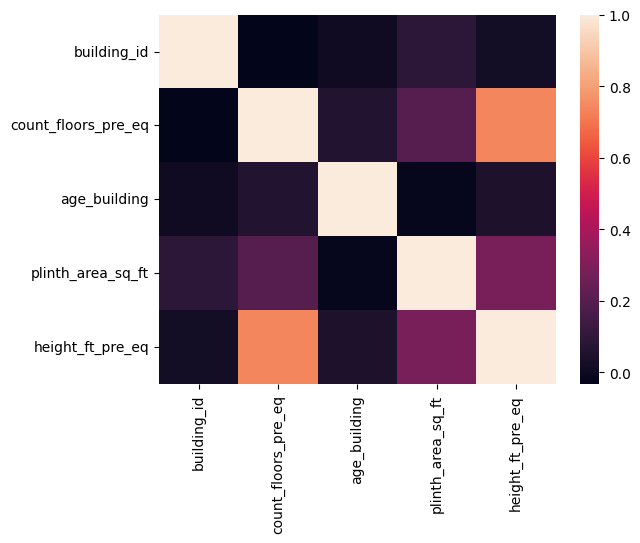

In [41]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="severe_damage").corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);

count and height of floors stand out here so i'll investigate further on the correlation with the target and drop the other to avoid multicolinearity issues.

In [43]:
print(df["severe_damage"].corr(df["height_ft_pre_eq"]))
print(df["severe_damage"].corr(df["count_floors_pre_eq"]))

-0.0384765908330203
0.002892630372575257


Change wrangle function so that it drops the "count_floors_pre_eq" column

Before I build the model, let's see if we can identify any obvious differences between houses that were severely damaged in the earthquake ("severe_damage"==1) and those that were not ("severe_damage"==0). Let's start with a numerical feature.

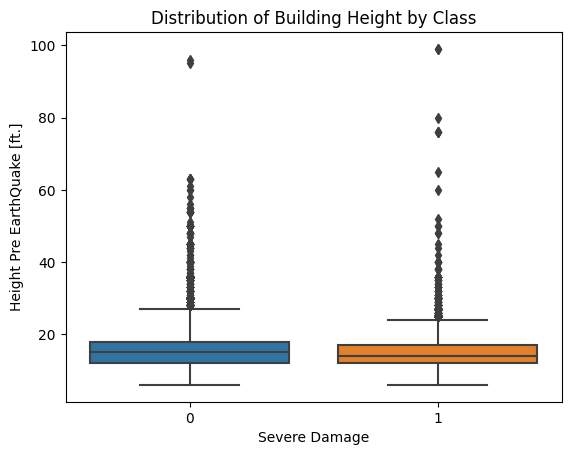

In [50]:
# Create boxplot that shows the distributions of the "height_ft_pre_eq" column 
# for both groups in the "severe_damage" column
sns.boxplot(x="severe_damage", y="height_ft_pre_eq", data=df)
# Label axes
plt.xlabel('Severe Damage')
plt.ylabel("Height Pre EarthQuake [ft.]")
plt.title("Distribution of Building Height by Class");

Before I move on to the many categorical features in this dataset, it's a good idea to see the balance between our two classes. What percentage were severely damaged, what percentage were not?

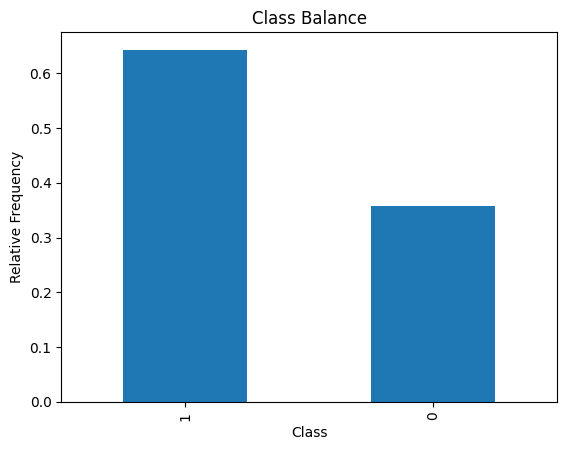

In [51]:
# Plot value counts of `"severe_damage"`
df["severe_damage"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);


Now we know the majority and minority class of the dataset.
The majority class refers to whatever category in a binary target occurs most frequently, and the minority class refers to whatever category in a binary target occurs less frequently

For the next set of visualizations, i'd like to create two variables, majority_class_prop and minority_class_prop, to store the normalized value counts for the two classes in df["severe_damage"].

In [52]:
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.6425969845841097 0.3574030154158902


Are buildings with certain foundation types more likely to suffer severe damage?
I'll create a pivot table with the index as "foundation_type" and the values come from the "severe_damage" column, aggregated by the mean

In [55]:
# Create pivot table
foundation_pivot = pd.pivot_table(
    df, index="foundation_type", values="severe_damage", aggfunc=np.mean
).sort_values(by="severe_damage")
foundation_pivot

,severe_damage
foundation_type,
RC,0.026224
Bamboo/Timber,0.324074
Cement-Stone/Brick,0.421908
Mud mortar-Stone/Brick,0.687792
Other,0.818898


How do the proportions in foundation_pivot compare to the proportions for our majority and minority classes?

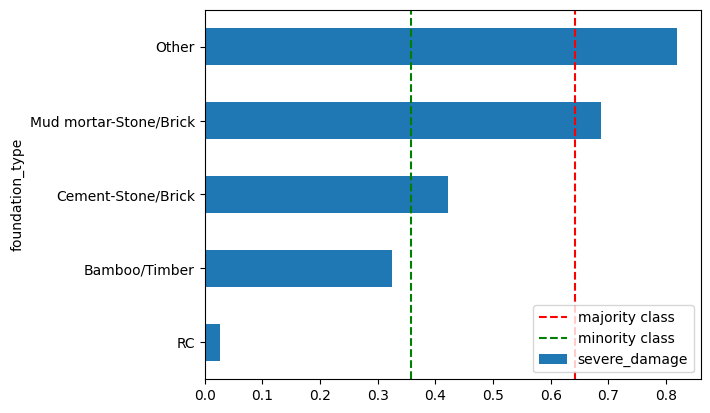

In [56]:
# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="green", label="minority class"
)
plt.legend(loc="lower right");

Finally, i'll check for high and low cardinality features in the dataset.

In [57]:
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            11
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70836 entries, 164002 to 234835
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   building_id             70836 non-null  int64 
 1   age_building            70836 non-null  int64 
 2   plinth_area_sq_ft       70836 non-null  int64 
 3   height_ft_pre_eq        70836 non-null  int64 
 4   land_surface_condition  70836 non-null  object
 5   foundation_type         70836 non-null  object
 6   roof_type               70836 non-null  object
 7   ground_floor_type       70836 non-null  object
 8   other_floor_type        70836 non-null  object
 9   position                70836 non-null  object
 10  plan_configuration      70836 non-null  object
 11  superstructure          70836 non-null  object
 12  severe_damage           70836 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 7.6+ MB


building_id is categorical but it is encoded as an integer and it would not particularly help with modeling as it is just a unique id for each building in the database. Therefore it will be dropped as it is a high cardinality feature.

Now i can commence model building.